<a href="https://colab.research.google.com/github/Har2i5/CNN_Malaria_Bloodcell_Classification-/blob/main/malaria_bloodcell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
In this notebook, I went forth to explore the classification of malaria-infected blood cells using Convulational Neural Networks (CNN).
* I began by importing necessary libraries, setting up the data directory, and examining the dataset, which includes images of both uninfected and parasitized blood cells.
* The goal was to preprocess the images, prepare them for training, and eventually build a model to accurately classify the cells based on their infection status.

# Data Exploration

##  Dataset  Description

The dataset consists of 13780 images of both parasitisized and uninfected images each.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Path Directory
data_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images'

In [ ]:
os.listdir(data_dir)

['Uninfected', 'Parasitized']

Realise that, there are two folders named 'Uninfected' and 'Parasitized' in our directory ("data_dir"),

In [ ]:
uninfected = data_dir + '/Uninfected/'

In [ ]:
parasitized = data_dir + '/Parasitized/'

In [ ]:
os.listdir(parasitized)[0]

'C99P60ThinF_IMG_20150918_141001_cell_93.png'

## Data Exploration
 To better understand the dataset, I went forth to display a a few sample of images to illustrate the difference between uninfected and parasitized cells.

In [ ]:
para_cell = parasitized + '/C99P60ThinF_IMG_20150918_141001_cell_93.png'

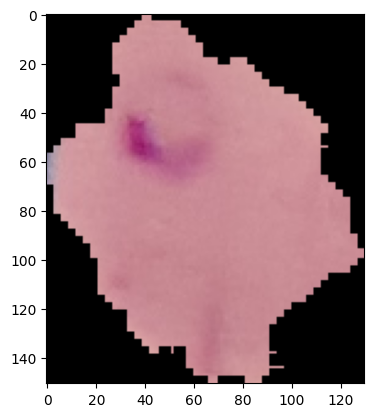

In [ ]:
plt.imshow(imread(para_cell))

The above image shows some distinct staining characteristics which is due to the presence of the malaria parasite.

In [ ]:
os.listdir(uninfected)[0]

'C203ThinF_IMG_20151029_102123_cell_51.png'

In [ ]:
uninfected_cell = uninfected + '/C203ThinF_IMG_20151029_102123_cell_51.png'

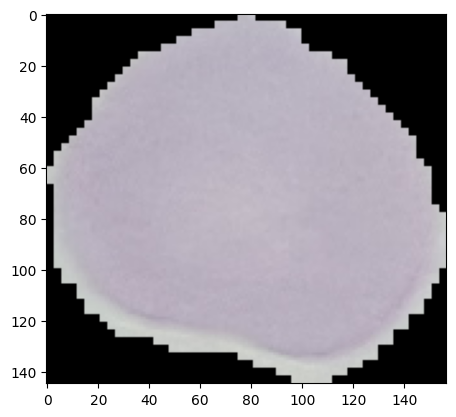

In [ ]:
plt.imshow(imread(uninfected_cell))

Compared to the previous image, there are no distinct staining characteristics that shows the presence of a malaria parasite, hence this image is an **Uninfected** cell.

In [ ]:
# Checking how many images they are in each set

print(f"Number of Parasitized Cells: {len(os.listdir(parasitized))}")

Number of Parasitized Cells: 13780


In [ ]:
print(f"Number of Uninfected Cells: {len(os.listdir(uninfected))}")

Number of Uninfected Cells: 13780


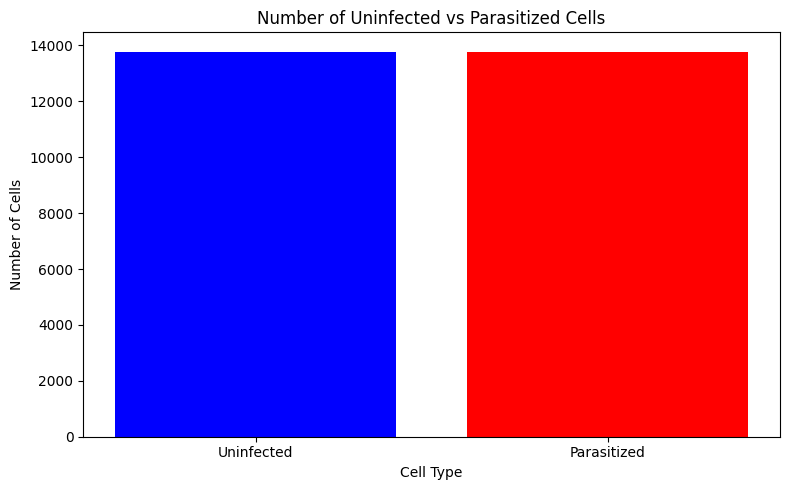

In [ ]:
# Data for plotting
labels = ['Uninfected','Parasitized']
counts = [len(os.listdir(uninfected)),len(os.listdir(parasitized))]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Number of Uninfected vs Parasitized Cells')
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.tight_layout()


Hence, we have the same number of parasitized and uninfected cells present in our data which signifies that our data is balanced.Hence, accuracy could be used to evaluate our model's performance.

In [ ]:
data_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images'

# Folder names
folder_names = ["Parasitized", "Uninfected"]

# Lists to hold the weight and height dimensions of the different varieties of images
dim1 = []
dim2 = []

valid_extensions = ['.png', '.jpg', '.jpeg']

# Loop for all classes
for folder in folder_names:
    folder_dir = os.path.join(data_dir, folder)
    for image in os.listdir(folder_dir):
        if any(image.endswith(ext) for ext in valid_extensions):
            img = imread(os.path.join(folder_dir, image))
            d1, d2, colors = img.shape
            dim1.append(d1)
            dim2.append(d2)


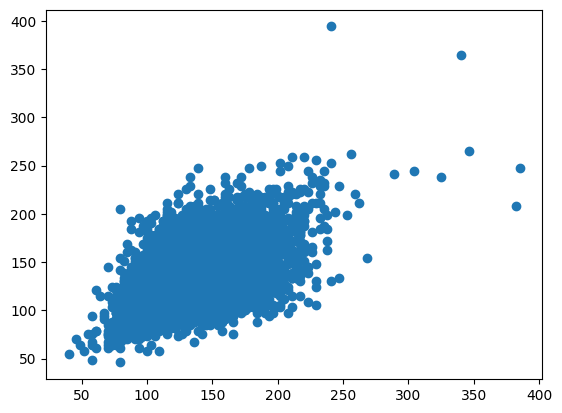

In [ ]:
plt.scatter(dim1,dim2)

From the scatterplot, we observe that,different images have different dimensions and most the images present in our data have dimensions concentrated between 100 - 200.
 I now went forth to check the mean dimensions so as to gain proper insights into variability of the images.

In [ ]:
np.mean(dim1)

132.9834530807751

In [ ]:
np.mean(dim2)

132.48715436533857

Knowing the mean dimensions to be 132, I used a dimension of 130.
The image was resized to 130 and rather than 132 so as to optimize memory usage without sacrificing too much detail.

In [ ]:
image_shape = (130,130,3)

In [ ]:
# Checking the maximum pixel value in the uninfected cell image
imread(uninfected_cell).max()

0.8392157

In [ ]:
# Checking the maximum pixel value in the parasitized cell image
imread(para_cell).max()

0.85882354

Both uninfected and parasitized images are bounded between [0,1], reason why there was no need for normalization.

# Data Preprocessing
Here, several preprocessing techniques were applied, including data augmentation so as to enhance model robustness.

In [ ]:
image_gen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1,shear_range =0.1,zoom_range = 0.1,horizontal_flip = True, fill_mode = 'nearest')

In [ ]:
image_gen.flow_from_directory(data_dir)

Found 27558 images belonging to 2 classes.


**Transformed Image**

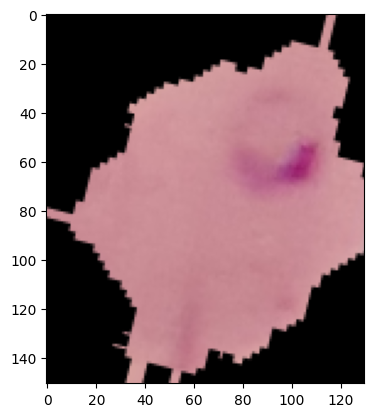

In [ ]:
para_img = imread(para_cell)
plt.imshow(image_gen.random_transform(para_img))

**Original Image**

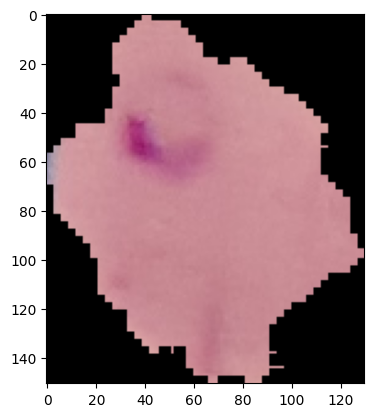

In [ ]:
plt.imshow(para_img)

We see there is a clear difference between the original image and the transformed image

**Partial Conclusion**

By transforming our images, we artificially increase the number of training examples, hence providing more data for the model to learn from which can improve our model's performance to generalize to test or unseen data.

# Model Development

* The model architecture consists of multiple convolutional layers followed by pooling layers, culminating in fully connected layers to enable efficient classification of input images.

* Since we are dealing with a binary classification task where the model needs to predict one of two possible classes (in this case, 'Uninfected' or 'Parasitized'), a sigmoid activation function was used which squashes the output to a range between 0 and 1.

* Moreso, the loss function used was the binary_crossentropy which easures the difference between the predicted probabilities and the actual class labels, helping the model adjust its weights during training to minimize this difference.

* Furthermore, the 'adam' optimizer was used as it combines the advantages of two other extensions of stochastic gradient descent, which allows for faster convergence and better performance in practice.

* Lastly,specifying the metrics=['accuracy'] allows one to monitor the accuracy of the model during training and evaluation.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

The model summary table provides a comprehensive overview of the CNN architecture used for classifying blood cells. It highlights the layers, their output shapes, and the number of parameters, which is crucial for understanding model complexity and capacity.

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
batch_size = 16

This section iterates through the subdirectories (folds) in the main data directory:
os.listdir(data_dir) lists all subdirectories (like parasitized and uninfected).
* For each subdirectory (fold), it constructs the path and lists all files (images).
* For each image file, it constructs the full file path and appends it to the filepaths list.
* It also appends the corresponding class label (the name of the subdirectory) to the labels list.

In [ ]:
# Creating an empty list
filepaths = []
labels = []

#  Adding files and tags in the data path
folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Dataframe Creation
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})


In [ ]:
# Separating the Training and Testing Data

train_df, test_df = train_test_split(df,test_size=0.2, shuffle=True, random_state=101)

80% of the data was used for training and the remaining 20% of the data, used for testing.

In [ ]:
print(len(train_df))
print(len(test_df))

22048
5512


In [ ]:
train_image_gen = image_gen.flow_from_dataframe(train_df,x_col ='filepaths', y_col ='labels', target_size = image_shape[:2], color_mode = 'rgb', batch_size = batch_size, class_mode = 'binary')

Found 22046 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
test_image_gen = image_gen.flow_from_dataframe(test_df,x_col ='filepaths', y_col ='labels', target_size = image_shape[:2], color_mode = 'rgb', batch_size = batch_size, class_mode = 'binary', shuffle = False)

Found 5512 validated image filenames belonging to 2 classes.


The test data is not shuffled so as to prevent the labels from getting shuffled around from the actual label points.

In [ ]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
results = model.fit(train_image_gen, epochs = 20, validation_data = test_image_gen, callbacks = [early_stop])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 437s 315ms/step - accuracy: 0.5394 - loss: 2.1216 - val_accuracy: 0.5836 - val_loss: 0.6769
Epoch 2/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 478s 346ms/step - accuracy: 0.5624 - loss: 0.6841 - val_accuracy: 0.5992 - val_loss: 0.6738
Epoch 3/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 437s 316ms/step - accuracy: 0.5788 - loss: 0.6801 - val_accuracy: 0.6018 - val_loss: 0.6666
Epoch 4/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 409s 296ms/step - accuracy: 0.5857 - loss: 0.6778 - val_accuracy: 0.5789 - val_loss: 0.6756
Epoch 5/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 409s 296ms/step - accuracy: 0.6154 - loss: 0.6627 - val_accuracy: 0.9345 - val_loss: 0.2250
Epoch 6/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 406s 294ms/step - accuracy: 0.9272 - loss: 0.2294 - val_accuracy: 0.9369 - val_loss: 0.2140
Epoch 7/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 406s 294ms/step - accuracy: 0.9367 - loss: 0.2005 - val_accuracy: 0.9445 - val_loss: 0.1775
Epoch 8/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 404s 293ms/step - accuracy: 0.9

Early stopping was implemented to prevent overfitting by halting training when validation performance stops improving. Since our model stopped at 10 epochs rather than going through the 20 epochs, it indicates that the validation accuracy of our model reached its' peak around that point.

## Model Peformance and Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.552844,0.912022,0.583636,0.676931
1,0.572122,0.681259,0.599238,0.673788
2,0.569264,0.681857,0.601778,0.666637
3,0.586909,0.675986,0.578919,0.675627
4,0.648916,0.618199,0.934507,0.224984


<Axes: >

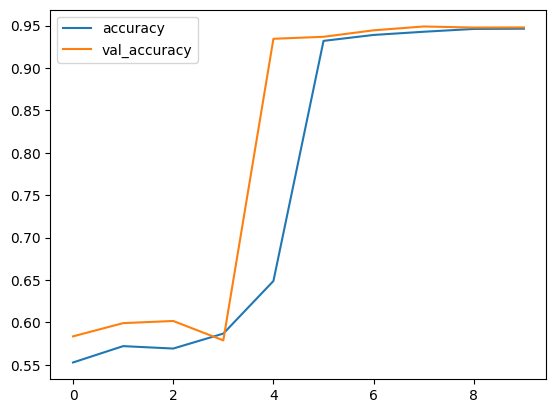

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

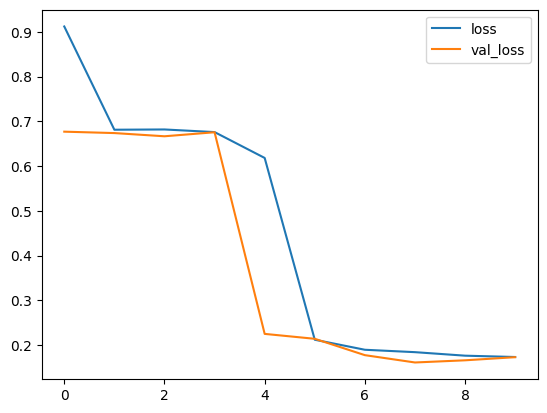

In [ ]:
metrics[['loss','val_loss']].plot()

By looking at the behaviour of our graphs, we see that both lines appear to converge at a high accuracy which is a good sign that our model generalizes well, hence indicating no signs of overfitting.

In [ ]:
model.evaluate(test_image_gen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 59s 170ms/step - accuracy: 0.9518 - loss: 0.1557


[0.16875842213630676, 0.9482946395874023]

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

# Conclusion
A loss value of 0.1688 indicates that our model is making accurate preditions. An acccuracy of (94.83%) means that nearly 95% of the test instances were classified correctly which indicates that the model is robust and performs well in distinguishing between the classes.

# Saving the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('malaria_cell_classifier.h5')

In [ ]:
saved_model=load_model('malaria_cell_classifier.h5')

In [ ]:
saved_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,211 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)